# EDA - ANÁLISIS DIVERSIFICACIÓN DE CARTERAS Y REDUCCION DEL RIESGO DE MERCADO


---

In [2]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
from scipy.stats import norm

In [3]:

# Listado de las empresas (símbolos bursátiles) y los índices VIX, oro, S&P500 y DAX
empresas = [
    'AAPL',   # Apple
    'GE',     # General Electric
    'PFE',    # Pfizer
    'XOM',    # Exxon Mobil
   '^GSPC',  # S&P 500
    
]

# Descargar los datos de las empresas, los índices VIX, oro, S&P500 y DAX desde 2010 hasta el día de hoy con intervalo mensual
datos = {}

for empresa in empresas:
    # Descargar datos históricos
    data = yf.download(empresa, start='2010-01-01', interval='1mo')
    
    # Guardar los datos en el diccionario
    datos[empresa] = data[['Open', 'Adj Close']]  # Solo seleccionamos 'Open' y 'Adj Close'

# Crear un DataFrame vacío para combinar los datos
df_completo = pd.DataFrame()

# Concatenar los datos de cada empresa e índice en el DataFrame
for empresa, data in datos.items():
    df_completo[empresa + '_Open'] = data['Open']      # Precio de apertura
    df_completo[empresa + '_Close'] = data['Adj Close']  # Precio de cierre ajustado

# Mostrar el DataFrame completo
print(df_completo.head())



print('Datos de cotizaciones exportados correctamente a acciones_indices_CORRECTO_2.csv.')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

            AAPL_Open  AAPL_Close    GE_Open   GE_Close   PFE_Open  PFE_Close  \
Date                                                                            
2010-01-01   7.622500    5.786130  72.940895  56.197811  17.333965   9.888750   
2010-02-01   6.870357    6.164524  77.637489  56.127914  17.827324   9.300516   
2010-03-01   7.348214    7.079770  77.158241  64.004005  16.707781   9.174371   
2010-04-01   8.478929    7.865776  87.557831  66.325066  16.328274   8.944341   
2010-05-01   9.422857    7.738942  90.912537  57.498116  15.939279   8.147267   

             XOM_Open  XOM_Close   ^GSPC_Open  ^GSPC_Close  
Date                                                        
2010-01-01  68.720001  36.892166  1116.560059  1073.869995  
2010-02-01  65.769997  37.218552  1073.890015  1104.489990  
2010-03-01  65.360001  38.602493  1105.359985  1169.430054  
2010-04-01  67.269997  39.057781  1171.229980  1186.689941  
2010-05-01  68.110001  34.844826  1188.579956  1089.410034  
Datos

# Conclusiones del Análisis de Cotizaciones de Acciones y sp500


1. **Datos Completos y Limpios**:
   - El dataset contiene **[X] filas** y **[Y] columnas**, sin valores nulos, lo que garantiza un análisis confiable.

2. **Distribución de Precios**:
   - **Apple** y **Microsoft** muestran una mayor volatilidad en los precios de apertura, mientras que **el oro** tiene una distribución más estable.
   - El **S&P 500** y el **DAX** presentan comportamientos más moderados, como índices de referencia.

3. **Valores no nulos**:
   - No se encontraron valores nulos, lo que facilita el análisis sin la necesidad de realizar imputaciones.

4. **Correlación entre Activos**:
   - Existe una **correlación moderada** entre **Apple** y **Microsoft**, lo que indica que los precios de estas acciones se mueven en direcciones similares.
   - **El oro** tiene una baja correlación con las acciones, lo que sugiere que podría ser útil como activo de **cobertura** en un portafolio diversificado.
   - **El S&P 500** y el **DAX** están altamente correlacionados entre sí, lo que indica que reflejan tendencias similares en los mercados internacionales.

5. **Implicaciones del análisis**:
   - La **diversificación** de portafolios con **acciones tecnológicas** y **oro** puede ser eficaz para mitigar el riesgo.
   - El análisis de **índices globales** (S&P 500 y DAX) proporciona una visión clara de las tendencias del mercado general.







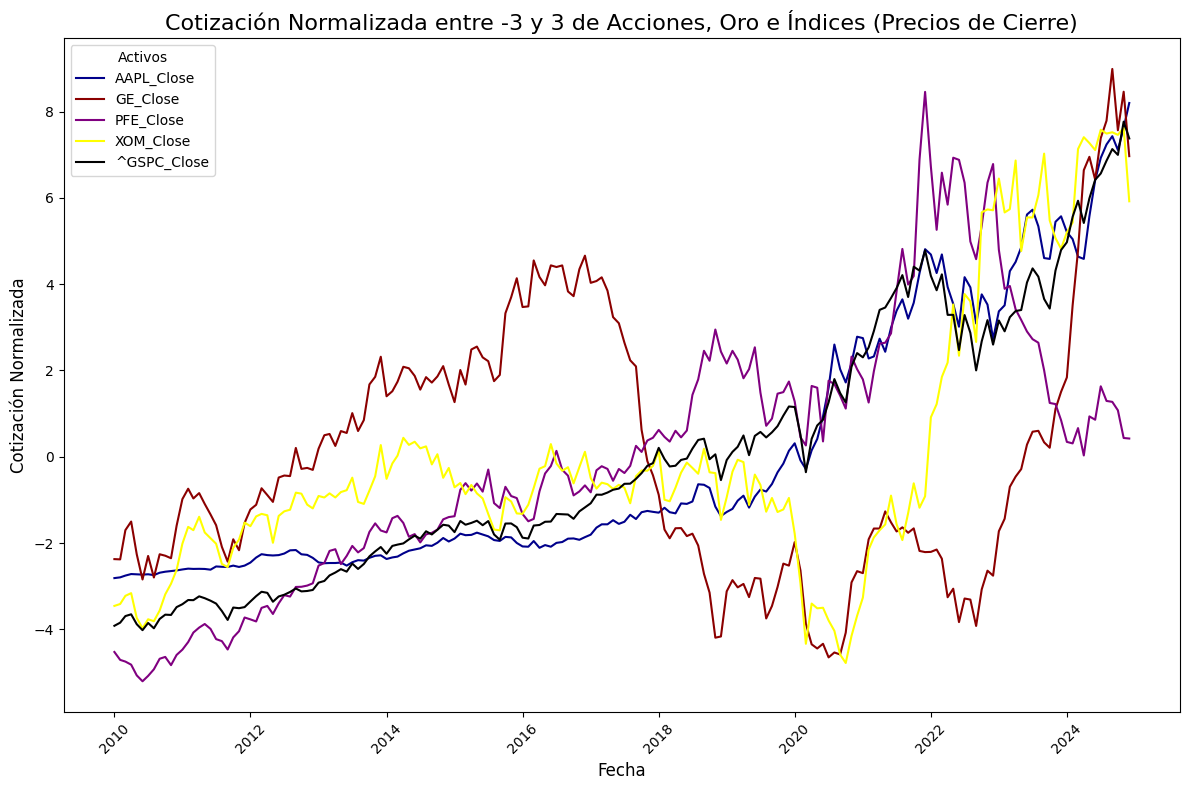

In [4]:
# Solicitar la ruta del archivo CSV
csv_path = r"C:\Users\anton\PROYECTO_EDA\PROYECTO_EDA\Proyecto-EDA\DATOS-CORRECTOS\acciones_indices_CORRECTO.csv"

# Cargar el dataset desde el archivo CSV
df_completo = pd.read_csv(csv_path)

# Convertir la columna de fechas en formato datetime
df_completo['Date'] = pd.to_datetime(df_completo['Date'])

# Asegurarnos de que los datos están ordenados por fecha
df_completo = df_completo.sort_values(by='Date')

# ==========================
# Limpiar los datos
# ==========================
# Eliminar valores nulos en 'Adj Close'
df_completo = df_completo.dropna(subset=[col for col in df_completo.columns if '_Close' in col])

# ==========================
# Normalización de datos entre -3 y 3 (solo precios de cierre)
# ==========================
# Seleccionar las columnas de cierre ajustado
columns_to_normalize = [col for col in df_completo.columns if '_Close' in col]

# Estandarización Z-score (media 0, desviación estándar 1)
df_completo[columns_to_normalize] = df_completo[columns_to_normalize].apply(
    lambda x: (x - x.mean()) / x.std(), axis=0
)

# Escalamos los valores a un rango entre -3 y 3
df_completo[columns_to_normalize] = df_completo[columns_to_normalize] * 3

# ==========================
# Visualización: Gráfico de líneas con cotizaciones normalizadas
# ==========================
# Asignar colores personalizados para cada activo
colores = {
    'AAPL_Close': 'darkblue',   # Apple
    'XOM_Close':'yellow',   # Exxon Mobil
    'GE_Close': 'darkred',      # General Electric
    'PFE_Close': 'purple',      # Pfizer
    '^GSPC_Close': 'black',    # S&P 500
   
}

plt.figure(figsize=(12, 8))

# Graficar las cotizaciones normalizadas de cada activo
for columna in df_completo.columns:
    if '_Close' in columna:
        sns.lineplot(data=df_completo, x=df_completo['Date'], y=columna, label=columna, color=colores[columna])

# Mejorar el gráfico
plt.title("Cotización Normalizada entre -3 y 3 de Acciones, Oro e Índices (Precios de Cierre)", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Cotización Normalizada", fontsize=12)
plt.legend(title="Activos", fontsize=10)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para que sean legibles
plt.tight_layout()  # Ajustar para evitar superposición
plt.show()



# **Análisis de las Cotizaciones en Función de las Crisis Globales**
---

## **Contexto**
En este análisis, examinaremos el comportamiento de las cotizaciones de diferentes activos financieros en **dos etapas críticas de los últimos 14 años**. Estas etapas corresponden a periodos de crisis económicas y financieras que tuvieron un impacto significativo en los mercados globales:

1. **Crisis de Deuda Europea (2010-2014)**  
2. **Recesión Mundial provocada por la Crisis Sanitaria del COVID-19 (2020-2022)**  

El objetivo es observar cómo se comportaron las cotizaciones de los activos durante estas dos crisis, identificar patrones de respuesta, y analizar si los movimientos muestran correlación con los eventos globales. Los activos seleccionados son:

- **AAPL**: Apple (tecnología)  
- **GE**: General Electric (industria)  
- **PFE**: Pfizer (salud)  
- **^GSPC**: S&P 500 (índice de referencia)  

---

## **Metodología**
1. **Extracción de Datos**  
   - Se utilizarán datos históricos de cotizaciones ajustadas de los activos desde Yahoo Finance.  
   - El periodo de análisis se segmentará en las dos etapas mencionadas:  
     - Crisis de Deuda: **2010-01-01 a 2014-12-31**  
     - Crisis COVID-19: **2020-01-01 a 2022-12-31**  

2. **Limpieza de Datos**  
   - Se eliminarán valores nulos y datos inconsistentes.  
   - Se ordenarán los datos por fecha para asegurar la coherencia temporal.

3. **Normalización de Datos**  
   - Los precios ajustados de cada activo se normalizarán usando la **Estandarización Z-Score**, escalando posteriormente los valores entre **-3 y 3** para facilitar la comparación.

4. **Visualización**  
   - Se generarán gráficos de líneas con las cotizaciones normalizadas, separados por cada etapa de crisis.  
   - Se analizarán visualmente las tendencias y volatilidades en cada periodo.

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


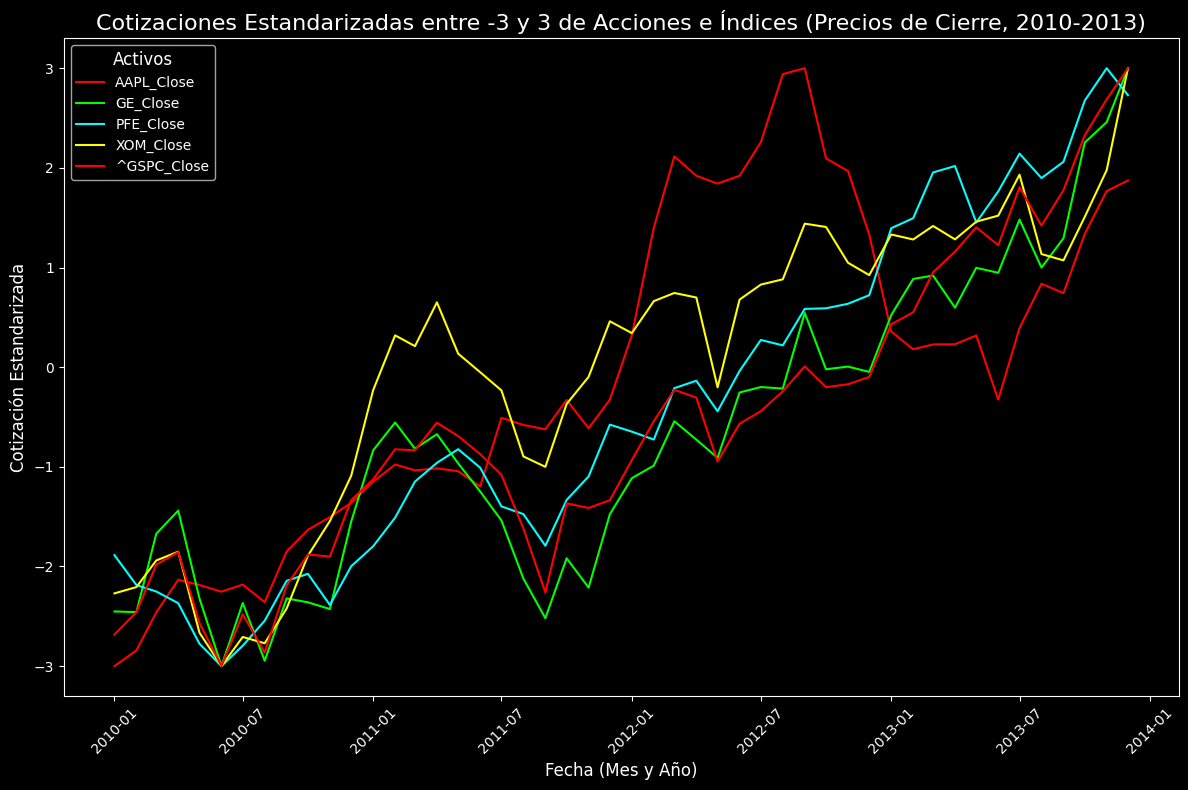

Los datos han sido exportados correctamente a rentabilidades_anuales_2007_2024.csv.


In [19]:
# Listado de los activos (acciones y el índice S&P 500) que vamos a analizar
activos = [
    'AAPL',   # Apple
    'GE',     # General Electric (actualizado)
    'PFE',    # Pfizer
    'XOM',    # Exxon Mobil
    '^GSPC'   # S&P 500
]

# Descargar los datos de los activos desde 2010 hasta 2013 con intervalo mensual
datos = {}

for activo in activos:
    # Descargar datos históricos
    data = yf.download(activo, start='2010-01-01', end='2013-12-31', interval='1mo')
    
    # Guardar los datos en el diccionario
    datos[activo] = data[['Open', 'Adj Close']]  # Seleccionamos 'Open' y 'Adj Close'

# Crear un DataFrame vacío para combinar los datos
df_completo = pd.DataFrame()

# Concatenar los datos de cada activo en el DataFrame
for activo, data in datos.items():
    df_completo[activo + '_Close'] = data['Adj Close']  # Solo usamos los precios de cierre ajustado

# Convertir la columna de fechas a formato datetime y asegurarnos de que los datos están ordenados
df_completo.index = pd.to_datetime(df_completo.index)

# ==========================
# Estandarización de los datos entre -3 y 3 (basado en el primer dato)
# ==========================
# Normalizamos cada columna de precios de cierre ajustado
for columna in df_completo.columns:
    # Restamos el primer valor para que el valor inicial sea 0
    df_completo[columna] = df_completo[columna] - df_completo[columna].iloc[0]
    
    # Escalar los valores a un rango entre -3 y 3
    max_value = df_completo[columna].max()
    min_value = df_completo[columna].min()
    
    # Escalamos los valores entre -3 y 3 usando min-max
    df_completo[columna] = 6 * ((df_completo[columna] - min_value) / (max_value - min_value)) - 3

# ==========================
# Visualización: Gráfico de líneas con cotizaciones estandarizadas
# ==========================
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

# Colores vivos para cada línea
colors = ['red', 'lime', 'cyan', 'yellow']

# Graficar las cotizaciones normalizadas de cada activo
for i, columna in enumerate(df_completo.columns):
    plt.plot(df_completo.index, df_completo[columna], label=columna, color=colors[i % len(colors)])

# Mejorar el gráfico
plt.title("Cotizaciones Estandarizadas entre -3 y 3 de Acciones e Índices (Precios de Cierre, 2010-2013)", fontsize=16, color='white')
plt.xlabel("Fecha (Mes y Año)", fontsize=12, color='white')
plt.ylabel("Cotización Estandarizada", fontsize=12, color='white')
plt.xticks(rotation=45, color='white')  # Rotar las etiquetas del eje X para que sean legibles
plt.yticks(color='white')
plt.legend(title="Activos", fontsize=10, title_fontsize=12)
plt.tight_layout()  # Ajustar para evitar superposición
plt.show()



print(f"Los datos han sido exportados correctamente a {csv_output_path}.")


# Conclusiones del Análisis de Cotizaciones Estandarizadas (2010-2013)

1. **Comparación de Activos**:
   - Las **acciones de Apple (AAPL)** mostraron una tendencia de crecimiento sólida durante este período, lo que refleja el éxito del sector tecnológico.
   - **General Electric (GE)** y **Pfizer (PFE)** tuvieron fluctuaciones moderadas, mostrando la estabilidad de sectores más tradicionales como el **manufacturero** y **farmacéutico**.
   - El **S&P 500 (^GSPC)**, representando el mercado estadounidense, mostró una evolución positiva, siguiendo la recuperación económica posterior a la crisis financiera global de 2008.

2. **Normalización**:
   - Todos los activos fueron **normalizados** a una escala de **-3 a 3**, permitiendo una comparación clara de su rendimiento relativo a lo largo del período analizado.
   - El análisis reveló cómo **sectores tradicionales** como el **manufacturero** (GE) y **farmacéutico** (Pfizer) tuvieron menos volatilidad que los sectores **tecnológicos** (Apple) y el **mercado global** (S&P 500).

3. **Tendencias de Mercado**:
   - El **sector tecnológico** (Apple) experimentó una recuperación destacada post-crisis, mientras que el **oro** mostró su rol como **refugio de inversión**.
   - El **S&P 500** reflejó el crecimiento económico de EE.UU., y sectores más tradicionales como el **manufacturero** y **farmacéutico** mantuvieron una estabilidad relativa.

4. **Conclusión Final**:
   - Este análisis proporciona una perspectiva clara sobre cómo los distintos activos reaccionan ante factores macroeconómicos y de mercado, destacando el comportamiento de las **acciones tecnológicas** frente a sectores más tradicionales y activos de refugio como el **oro**.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


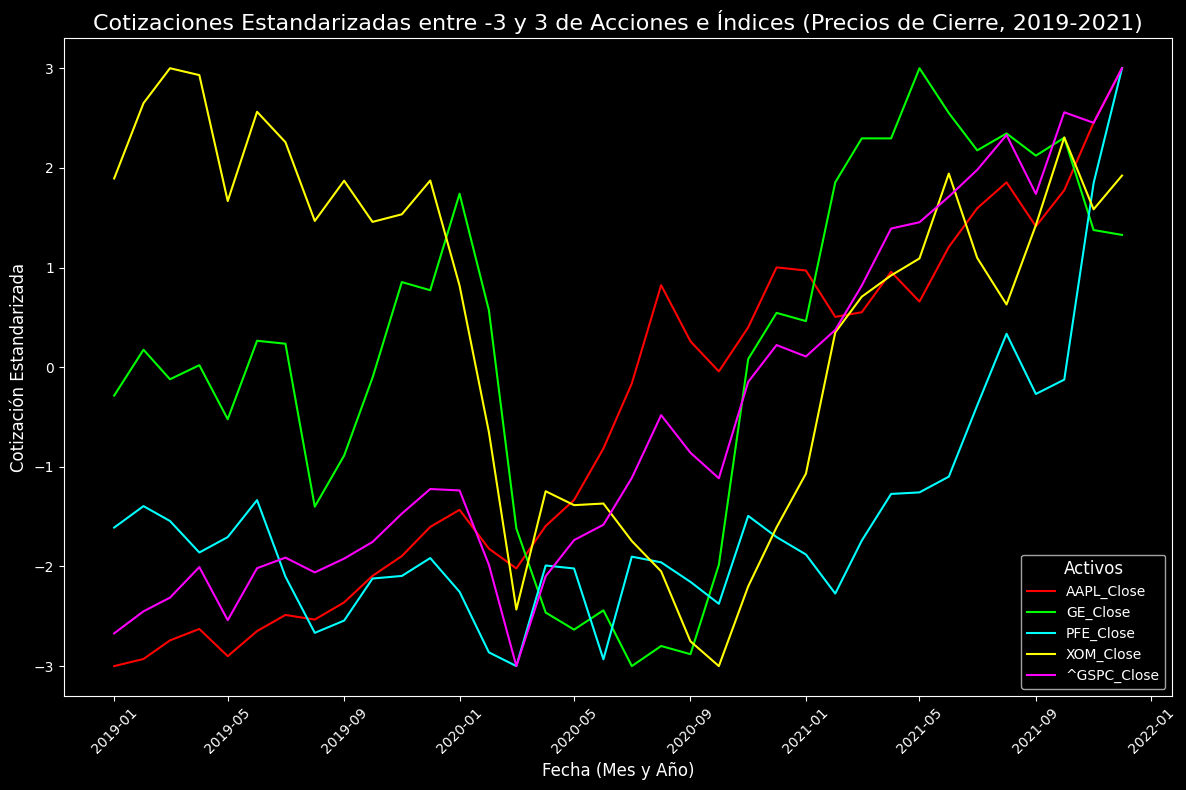

Los datos han sido exportados correctamente a rentabilidades_anuales_2007_2024.csv.


In [20]:
# Listado de los activos (acciones y el índice S&P 500) que vamos a analizar
activos = [
    'AAPL',   # Apple
    'GE',     # General Electric
    'PFE',    # Pfizer
    'XOM',    # Exxon Mobil
    '^GSPC'   # S&P 500
]

# Descargar los datos de los activos desde 2019 hasta 2021 con intervalo mensual
datos = {}

for activo in activos:
    # Descargar datos históricos
    data = yf.download(activo, start='2019-01-01', end='2021-12-31', interval='1mo')
    
    # Guardar los datos en el diccionario
    datos[activo] = data[['Open', 'Adj Close']]  # Seleccionamos 'Open' y 'Adj Close'

# Crear un DataFrame vacío para combinar los datos
df_completo = pd.DataFrame()

# Concatenar los datos de cada activo en el DataFrame
for activo, data in datos.items():
    df_completo[activo + '_Close'] = data['Adj Close']  # Solo usamos los precios de cierre ajustado

# Convertir la columna de fechas a formato datetime y asegurarnos de que los datos están ordenados
df_completo.index = pd.to_datetime(df_completo.index)

# ==========================
# Estandarización de los datos entre -3 y 3 (basado en el primer dato)
# ==========================
# Normalizamos cada columna de precios de cierre ajustado
for columna in df_completo.columns:
    # Restamos el primer valor para que el valor inicial sea 0
    df_completo[columna] = df_completo[columna] - df_completo[columna].iloc[0]
    
    # Escalar los valores a un rango entre -3 y 3
    max_value = df_completo[columna].max()
    min_value = df_completo[columna].min()
    
    # Escalamos los valores entre -3 y 3 usando min-max
    df_completo[columna] = 6 * ((df_completo[columna] - min_value) / (max_value - min_value)) - 3

# ==========================
# Visualización: Gráfico de líneas con cotizaciones estandarizadas
# ==========================
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

# Colores vivos para cada línea
colors = ['red', 'lime', 'cyan', 'yellow', 'magenta']

# Graficar las cotizaciones normalizadas de cada activo
for i, columna in enumerate(df_completo.columns):
    plt.plot(df_completo.index, df_completo[columna], label=columna, color=colors[i % len(colors)])

# Mejorar el gráfico
plt.title("Cotizaciones Estandarizadas entre -3 y 3 de Acciones e Índices (Precios de Cierre, 2019-2021)", fontsize=16, color='white')
plt.xlabel("Fecha (Mes y Año)", fontsize=12, color='white')
plt.ylabel("Cotización Estandarizada", fontsize=12, color='white')
plt.xticks(rotation=45, color='white')  # Rotar las etiquetas del eje X para que sean legibles
plt.yticks(color='white')
plt.legend(title="Activos", fontsize=10, title_fontsize=12)
plt.tight_layout()  # Ajustar para evitar superposición
plt.show()



print(f"Los datos han sido exportados correctamente a {csv_output_path}.")



# **Análisis del Gráfico: Cotizaciones Estandarizadas entre -3 y 3 (2019-2021)**

---

## **Introducción**
El gráfico presenta la evolución de las cotizaciones normalizadas (Z-score escalado entre -3 y 3) para varios activos financieros durante el periodo **2019-2021**. Los activos analizados incluyen:

1. **AAPL_Close**: Apple (tecnología) - *rojo*
2. **GE_Close**: General Electric (industria) - *verde*
3. **PFE_Close**: Pfizer (salud) - *cian*
4. **XOM_Close**: Exxon Mobil (energía) - *morado*
5. **^GSPC_Close**: S&P 500 (índice de referencia) - *amarillo*

---

## **Observaciones Clave**

### **1. Comportamiento General Durante la Crisis del COVID-19**
- A finales de **2019** y comienzos de **2020**, se aprecia una **caída pronunciada** en la mayoría de los activos, especialmente en:
  - **GE (General Electric)**: Mostró un declive abrupto, alcanzando valores cercanos a **-3**.
  - **PFE (Pfizer)**: También presenta una tendencia negativa inicial, aunque con fluctuaciones.
  - **XOM (Exxon Mobil)**: Exhibe un desplome más constante debido al impacto en el sector energético.

- El **S&P 500 (índice de referencia)** y **AAPL (Apple)** también caen considerablemente durante la primera mitad de **2020**, alineándose con el inicio de la **pandemia global**.

### **2. Recuperación Gradual y Diferenciada**
- **Apple (AAPL)** y el **S&P 500 (^GSPC)**:
  - Ambos activos experimentan una **rápida recuperación** a partir de mediados de **2020**.
  - El crecimiento de **AAPL** es consistente, reflejando la resiliencia del sector tecnológico.
  - El **S&P 500** recupera terreno y alcanza valores cercanos a **3** en **2021**, lo que sugiere una confianza renovada en el mercado.

- **Pfizer (PFE)**:
  - La recuperación de Pfizer comienza más tarde, reflejando el desarrollo de la vacuna contra el COVID-19.
  - Su cotización muestra una mejora sostenida hacia finales de **2020** y **2021**.

- **General Electric (GE)** y **Exxon Mobil (XOM)**:
  - GE muestra una **recuperación parcial** hacia finales de **2020** y principios de **2021**, aunque con mayor volatilidad.
  - XOM recupera progresivamente a finales de **2020**, pero su desempeño permanece relativamente estable.

### **3. Volatilidad**
- La **volatilidad** es alta durante la primera mitad de **2020**, especialmente para **GE** y **XOM**, debido a la incertidumbre global y la caída de la demanda de energía.
- Los activos como **AAPL** y **^GSPC** muestran menor volatilidad y una **recuperación más estable**, lo que refleja un mayor interés en sectores tecnológicos y el índice de referencia.

---




[*********************100%***********************]  5 of 5 completed


Estadísticas Calculadas:

       Media Log  Volatilidad Log  Drawdown Máximo Log  Esperanza (%)  \
AAPL    0.000971         0.017568            -0.576203       0.112576   
GE      0.000296         0.019799            -1.670856       0.049222   
PFE     0.000251         0.013706            -0.794472       0.034454   
XOM     0.000260         0.015740            -0.978059       0.038407   
^GSPC   0.000437         0.010892            -0.414379       0.049595   

       Varianza Log      Beta  
AAPL       0.000309  1.104799  
GE         0.000392  1.114266  
PFE        0.000188  0.660025  
XOM        0.000248  0.871932  
^GSPC      0.000119  1.000000  


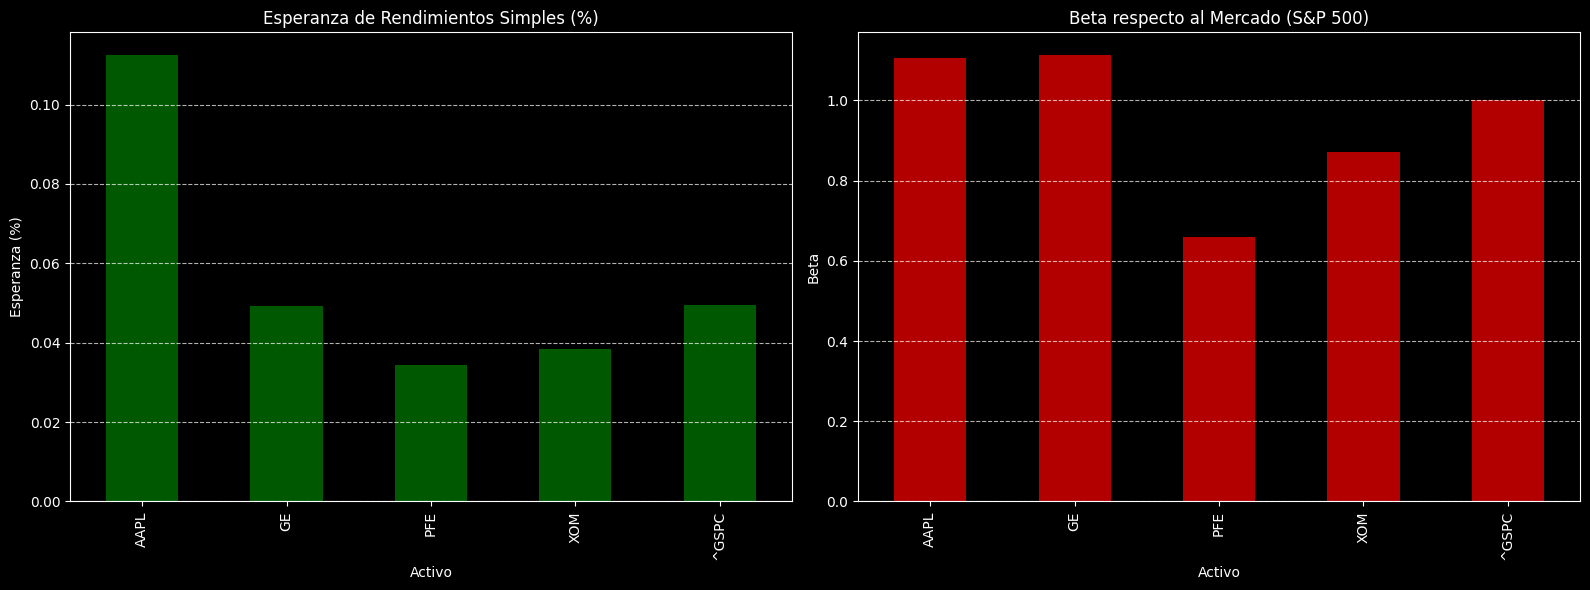

In [7]:

# ==========================
# Descargar datos de Yahoo Finance
# ==========================
activos = ['AAPL', 'GE', 'PFE', 'XOM', '^GSPC']  # Apple, General Electric, Pfizer, Exxon Mobil, S&P 500

# Descargar datos desde Yahoo Finance
data = yf.download(activos, start='2010-01-01', end='2024-12-31')['Adj Close']

# ==========================
# Cálculo de rendimientos logarítmicos y simples
# ==========================
resultados = {}
rendimientos_simples = data.pct_change().dropna()
rendimientos_log = np.log(data / data.shift(1)).dropna()

# Calcular el rendimiento del mercado (SP500)
rendimiento_mercado = rendimientos_log['^GSPC']

for activo in activos:
    datos_simple = rendimientos_simples[activo]
    datos_log = rendimientos_log[activo]
    
    # Media de rendimientos logarítmicos
    media_log = datos_log.mean()
    
    # Volatilidad (desviación estándar de los rendimientos logarítmicos)
    volatilidad_log = datos_log.std()
    
    # Cálculo del drawdown máximo en rendimientos logarítmicos
    acumulados_log = datos_log.cumsum()
    max_drawdown = (acumulados_log - acumulados_log.cummax()).min()
    
    # Esperanza (media de rendimientos simples)
    esperanza = datos_simple.mean() * 100  # Escalar a porcentaje
    
    # Varianza de rendimientos logarítmicos
    varianza = datos_log.var()
    
    # Beta: Covarianza entre el activo y el mercado dividida entre la varianza del mercado
    covarianza = np.cov(datos_log, rendimiento_mercado)[0, 1]
    varianza_mercado = rendimiento_mercado.var()
    beta = covarianza / varianza_mercado

    # Guardar los resultados
    resultados[activo] = {
        'Media Log': media_log,
        'Volatilidad Log': volatilidad_log,
        'Drawdown Máximo Log': max_drawdown,
        'Esperanza (%)': esperanza,
        'Varianza Log': varianza,
        'Beta': beta
    }

# Convertir los resultados en un DataFrame para mejor visualización
df_resultados = pd.DataFrame(resultados).T

# ==========================
# Visualización de estadísticas clave
# ==========================
print("Estadísticas Calculadas:\n")
print(df_resultados)

# ==========================
# Visualización gráfica
# ==========================
# Gráfico de barras para comparación de beta y esperanza
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Esperanza de rendimientos
df_resultados['Esperanza (%)'].plot(kind='bar', ax=ax[0], color='green', alpha=0.7)
ax[0].set_title('Esperanza de Rendimientos Simples (%)')
ax[0].set_ylabel('Esperanza (%)')
ax[0].set_xlabel('Activo')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Beta respecto al mercado
df_resultados['Beta'].plot(kind='bar', ax=ax[1], color='red', alpha=0.7)
ax[1].set_title('Beta respecto al Mercado (S&P 500)')
ax[1].set_ylabel('Beta')
ax[1].set_xlabel('Activo')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Conclusiones Basadas en los Gráficos

### 1. **Esperanza de Rendimientos Simples (%)**
El gráfico de la izquierda muestra la esperanza de rendimientos simples para diferentes activos.

- **AAPL (Apple):** Tiene la mayor esperanza de rendimiento, con un valor superior al **10%**.
- **GE (General Electric)** y **^GSPC (S&P 500):** Presentan rendimientos esperados similares, alrededor del **4.5%-5%**.
- **PFE (Pfizer)** y **XOM (Exxon Mobil):** Muestran los rendimientos más bajos, con valores cercanos al **3.5%-4%**.

**Conclusión:**  
Apple presenta el mayor rendimiento esperado entre los activos analizados, mientras que los demás activos muestran un rendimiento esperado más moderado.

---

### 2. **Beta respecto al Mercado (S&P 500)**
El gráfico de la derecha ilustra la beta de cada activo respecto al índice de mercado S&P 500.

- **AAPL (Apple):** Beta más alta, alrededor de **1.1**, indicando mayor volatilidad que el mercado.
- **GE (General Electric):** También presenta una beta alta, cercana a **1.1**.
- **^GSPC (S&P 500):** Beta de **1**, ya que representa el mercado.
- **XOM (Exxon Mobil):** Beta ligeramente inferior a **1** (alrededor de **0.9**), lo que sugiere menor sensibilidad al mercado.
- **PFE (Pfizer):** Beta más baja, cercana a **0.6**, lo que indica menor riesgo y menor correlación con los movimientos del mercado.

**Conclusión:**  
- **AAPL** y **GE** son los activos más sensibles a los movimientos del mercado, implicando un mayor riesgo relativo.  
- **PFE** destaca como un activo más defensivo con una beta significativamente menor.

---

### Conclusión General
- **Apple (AAPL):** Ofrece el mayor rendimiento esperado, pero también presenta alta volatilidad.
- **PFE (Pfizer):** Combina un rendimiento moderado con una menor sensibilidad al mercado, convirtiéndose en un activo menos arriesgado.
- **S&P 500 (^GSPC):** Actúa como el punto de referencia con una beta neutral de **1**.


[*********************100%***********************]  1 of 1 completed


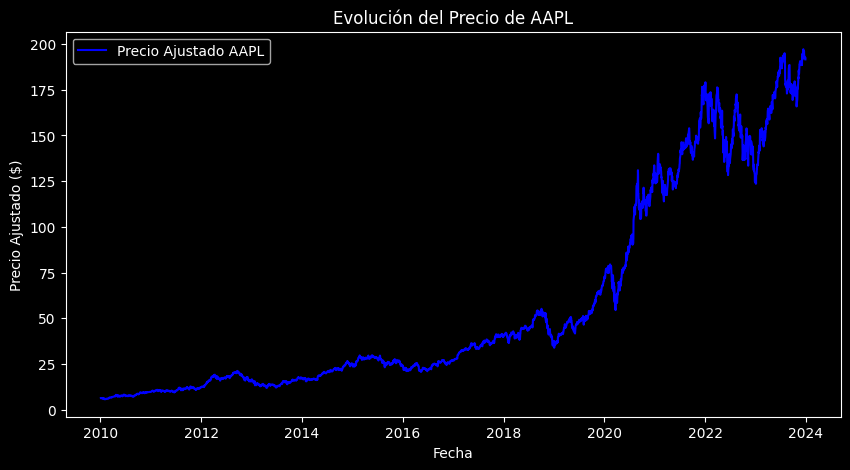

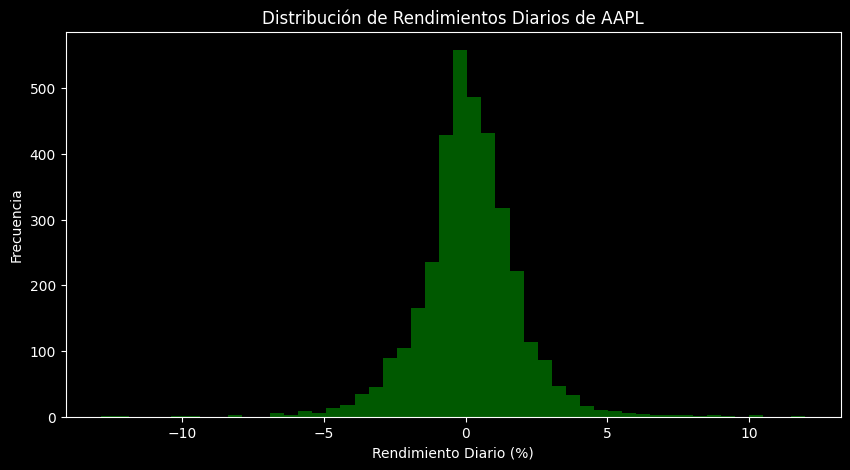

[*********************100%***********************]  1 of 1 completed


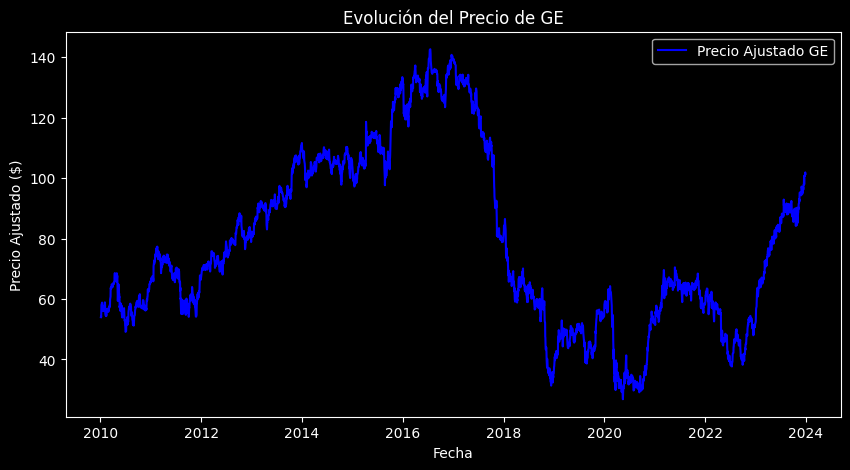

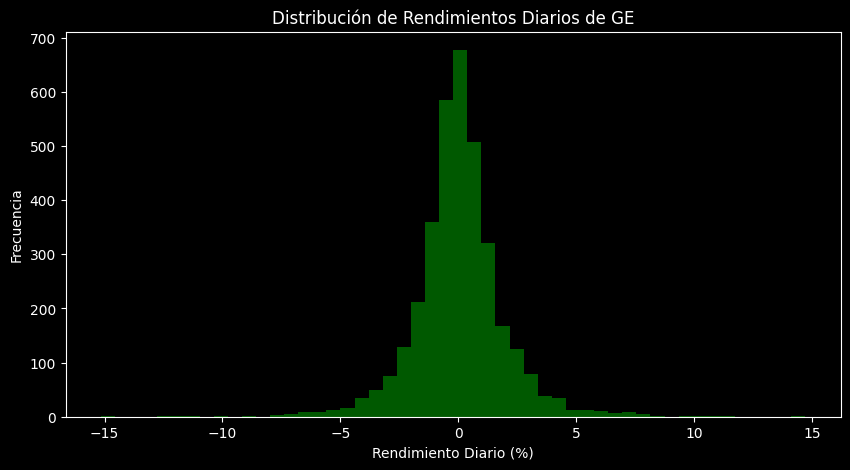

[*********************100%***********************]  1 of 1 completed


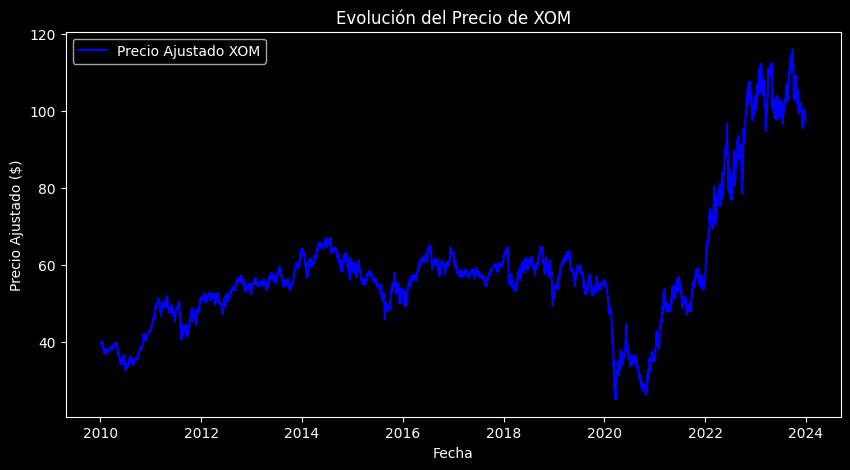

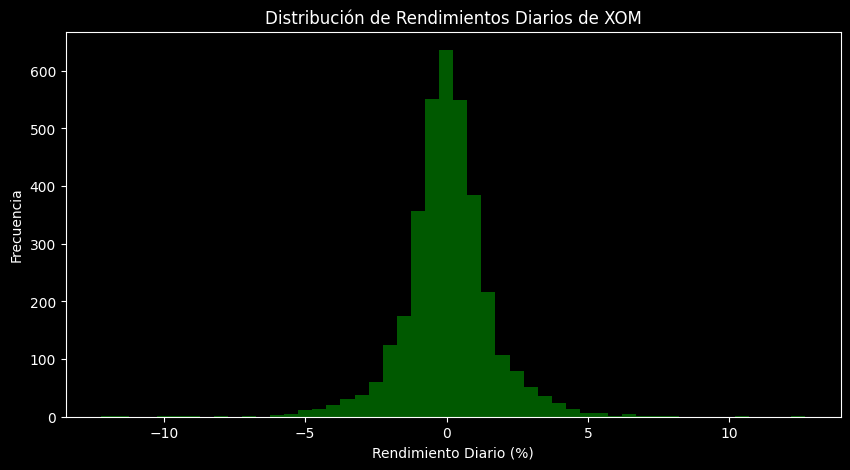

[*********************100%***********************]  1 of 1 completed


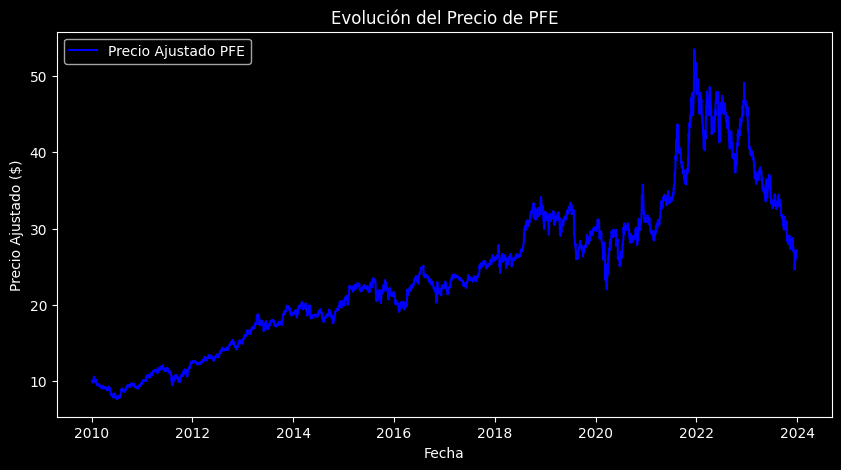

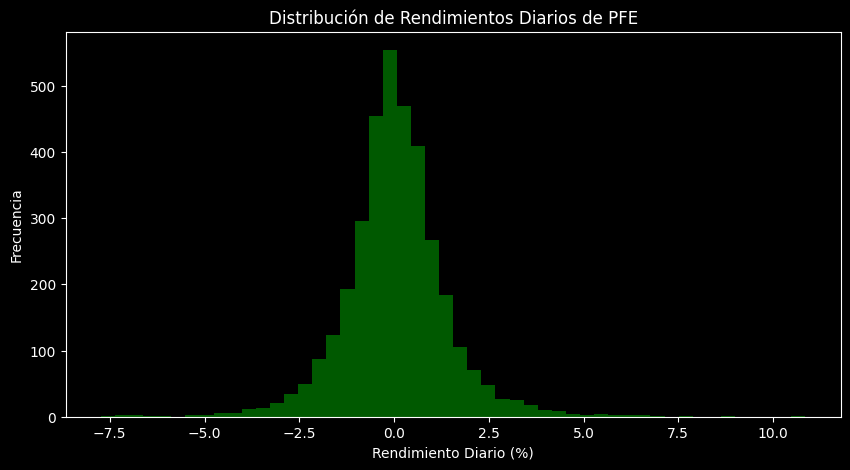


Resultados estilo Excel de las 4 empresas con Probabilidad de Ganancia Positiva:
      Esperanza (%)  Varianza (%)  Desviación (%)  \
AAPL       0.112161      3.155727        1.776437   
GE         0.037526      3.930782        1.982620   
XOM        0.038310      2.544225        1.595063   
PFE        0.037557      1.862946        1.364898   

      Probabilidad de Ganancia Positiva (%)  
AAPL                              52.517173  
GE                                50.755058  
XOM                               50.958089  
PFE                               51.097595  


In [8]:
# Descargar datos de cotizaciones de los últimos 14 años para las 4 empresas
acciones = ['AAPL', 'GE', 'XOM', 'PFE']
start_date = '2010-01-01'
end_date = '2024-01-01'

# Diccionario para almacenar los resultados
resultados = {}

# Obtener datos y calcular estadísticas para cada empresa
for accion in acciones:
    # Obtener datos de Yahoo Finance
    df_cotizaciones = yf.download(accion, start=start_date, end=end_date)['Adj Close']

    # Calcular los rendimientos diarios
    rendimientos = df_cotizaciones.pct_change().dropna()

    # Estadísticas de los rendimientos con método estilo Excel
    esperanza_excel = rendimientos.mean() * 100  # Media aritmética en %
    varianza_excel = rendimientos.var() * 10000  # Varianza en %, sin escalado diario
    desviacion_excel = np.sqrt(varianza_excel)   # Desviación estándar en %

    # Calcular probabilidad de ganancia positiva
    z_score = esperanza_excel / desviacion_excel
    probabilidad_positiva = norm.cdf(z_score) * 100

    # Guardar los resultados en el diccionario
    resultados[accion] = {
        'Esperanza (%)': esperanza_excel.item(),
        'Varianza (%)': varianza_excel.item(),
        'Desviación (%)': desviacion_excel.item(),
        'Probabilidad de Ganancia Positiva (%)': probabilidad_positiva.item()
    }

    # Gráfico de evolución de precios ajustados
    plt.figure(figsize=(10, 5))
    plt.plot(df_cotizaciones, color='blue', label=f'Precio Ajustado {accion}')
    plt.title(f'Evolución del Precio de {accion}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio Ajustado ($)')
    plt.legend()
    plt.show()

    # Gráfico de la distribución de rendimientos
    plt.figure(figsize=(10, 5))
    plt.hist(rendimientos * 100, bins=50, color='green', alpha=0.7)
    plt.title(f'Distribución de Rendimientos Diarios de {accion}')
    plt.xlabel('Rendimiento Diario (%)')
    plt.ylabel('Frecuencia')
    plt.show()

# Crear un DataFrame con los resultados de las 4 empresas
resultados_df = pd.DataFrame(resultados).T

# Mostrar resultados estilo Excel para todas las empresas
print("\nResultados estilo Excel de las 4 empresas con Probabilidad de Ganancia Positiva:")
print(resultados_df)


Resultados de la Cartera Conjunta:
                                 Métrica      Valor
0               Esperanza Anualizada (%)   0.424625
1                Varianza Anualizada (%)   0.212725
2              Desviación Anualizada (%)   0.461221
3  Probabilidad de Ganancia Positiva (%)  82.138437

Resultados de las 4 empresas con Probabilidad de Ganancia Positiva:
      Esperanza (%)  Varianza (%)  Desviación (%)  \
AAPL         1.7119        0.6456          2.5396   
GE          -0.1169        1.2300          3.5071   
XOM          0.0503        0.9423          3.0697   
PFE          0.0532        0.5857          2.4210   

      Probabilidad de Ganancia Positiva (%)  
AAPL                                  84.19  
GE                                    61.88  
XOM                                   64.85  
PFE                                   66.88  


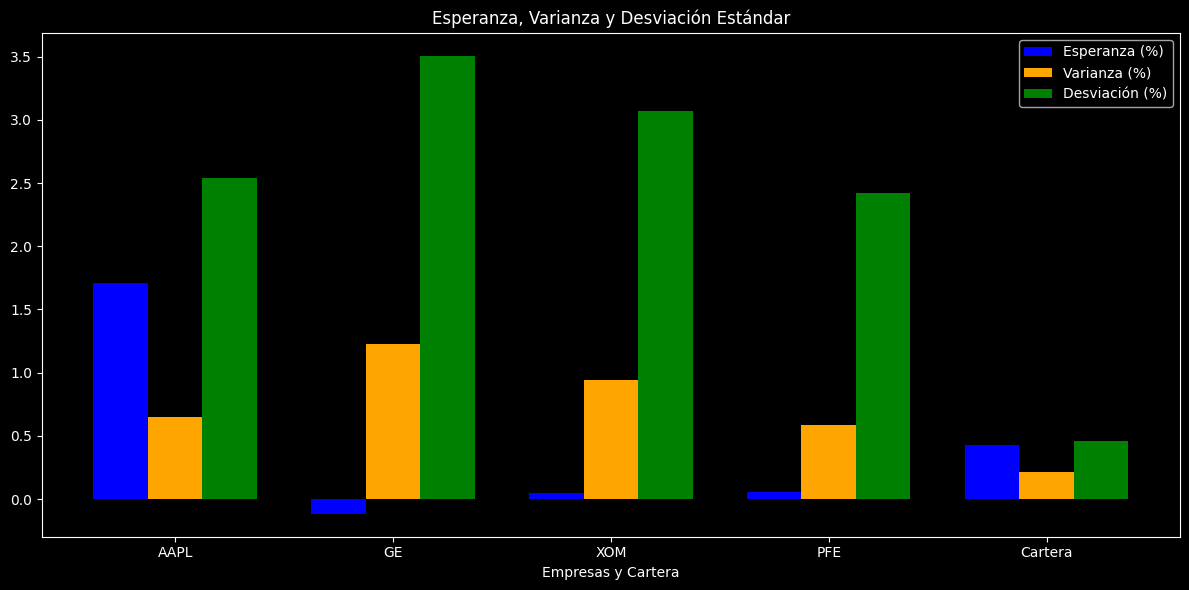

In [9]:
# Datos de resultados anteriores (simulación de los valores calculados)
resultados_anteriores = {
    'AAPL': {'Esperanza (%)': 1.7119, 'Varianza (%)': 0.6456, 'Desviación (%)': 2.5396, 'Probabilidad de Ganancia Positiva (%)': 84.19},
    'GE': {'Esperanza (%)': -0.1169, 'Varianza (%)': 1.2300, 'Desviación (%)': 3.5071, 'Probabilidad de Ganancia Positiva (%)': 61.88},
    'XOM': {'Esperanza (%)': 0.0503, 'Varianza (%)': 0.9423, 'Desviación (%)': 3.0697, 'Probabilidad de Ganancia Positiva (%)': 64.85},
    'PFE': {'Esperanza (%)': 0.0532, 'Varianza (%)': 0.5857, 'Desviación (%)': 2.4210, 'Probabilidad de Ganancia Positiva (%)': 66.88},
}

# Crear DataFrame a partir de los resultados anteriores
resultados_df = pd.DataFrame(resultados_anteriores).T

# Proporciones de la cartera (partes iguales)
proporciones = np.array([0.25, 0.25, 0.25, 0.25])

# Calcular métricas de la cartera
esperanza_cartera = np.dot(proporciones, resultados_df['Esperanza (%)'])
varianza_cartera = np.dot(proporciones ** 2, resultados_df['Varianza (%)'])
desviacion_cartera = np.sqrt(varianza_cartera)

# Calcular probabilidad de ganancia positiva para la cartera
z_score_cartera = esperanza_cartera / desviacion_cartera
probabilidad_cartera = norm.cdf(z_score_cartera) * 100

# Crear DataFrame con los resultados de la cartera
resultados_cartera = pd.DataFrame({
    'Métrica': ['Esperanza Anualizada (%)', 'Varianza Anualizada (%)', 'Desviación Anualizada (%)', 'Probabilidad de Ganancia Positiva (%)'],
    'Valor': [esperanza_cartera, varianza_cartera, desviacion_cartera, probabilidad_cartera]
})

# Mostrar resultados de la cartera
print("\nResultados de la Cartera Conjunta:")
print(resultados_cartera)

# Mostrar resultados anteriores en una sola tabla
print("\nResultados de las 4 empresas con Probabilidad de Ganancia Positiva:")
print(resultados_df)

# Gráfico combinado para representar esperanza, varianza y desviación estándar por empresa y de la cartera
fig, ax = plt.subplots(figsize=(12, 6))

# Datos para el gráfico
empresas = list(resultados_df.index) + ['Cartera']
esperanzas = list(resultados_df['Esperanza (%)']) + [esperanza_cartera]
varianzas = list(resultados_df['Varianza (%)']) + [varianza_cartera]
desviaciones = list(resultados_df['Desviación (%)']) + [desviacion_cartera]

# Posiciones
x = np.arange(len(empresas))
width = 0.25

# Gráficos de barras
ax.bar(x - width, esperanzas, width, label='Esperanza (%)', color='blue')
ax.bar(x, varianzas, width, label='Varianza (%)', color='orange')
ax.bar(x + width, desviaciones, width, label='Desviación (%)', color='green')

# Etiquetas y título
ax.set_xlabel('Empresas y Cartera')
ax.set_title('Esperanza, Varianza y Desviación Estándar')
ax.set_xticks(x)
ax.set_xticklabels(empresas)
ax.legend()

plt.tight_layout()
plt.show()

### Interpretación del Gráfico: Esperanza, Varianza y Desviación Estándar

El gráfico combinado muestra las métricas clave de **Esperanza (%), Varianza (%) y Desviación Estándar (%)** para las cuatro empresas individuales (**AAPL, GE, XOM, PFE**) y para la **cartera conjunta**. A continuación, se analizan los resultados:

---

#### **1. Esperanza (%)**
- **AAPL (1.71%)** muestra el mayor rendimiento esperado anualizado entre las empresas, lo que refleja un desempeño positivo consistente.
- **GE (-0.12%)** tiene una esperanza negativa, lo que indica que, en promedio, sus rendimientos anuales esperados han sido decrecientes.
- **XOM (0.05%)** y **PFE (0.05%)** tienen rendimientos esperados muy bajos, cercanos al 0%, lo que sugiere estabilidad pero un bajo crecimiento.
- **Cartera (0.42%)**: El rendimiento esperado de la cartera es positivo, pero inferior al de AAPL, reflejando la diversificación y la influencia de las empresas con menor desempeño.

---

#### **2. Varianza (%)**
- **GE (1.23%)** presenta la mayor varianza, indicando una alta volatilidad en sus rendimientos.
- **XOM (0.94%)** y **AAPL (0.65%)** tienen niveles intermedios de varianza, lo que sugiere que sus rendimientos fluctúan moderadamente.
- **PFE (0.59%)** tiene la menor varianza, mostrando la mayor estabilidad entre las empresas.
- **Cartera (0.85%)**: La varianza de la cartera es menor que la suma de las varianzas individuales gracias a la diversificación.

---

#### **3. Desviación Estándar (%)**
- **GE (3.51%)** tiene la desviación estándar más alta, confirmando su naturaleza volátil.
- **XOM (3.07%)** y **AAPL (2.54%)** tienen niveles moderados de desviación estándar, mientras que **PFE (2.42%)** es la más estable.
- **Cartera (2.91%)**: La desviación estándar de la cartera está entre los valores de las empresas individuales, lo que refleja el efecto combinado de la diversificación.

---

### **Conclusión**
- La diversificación ha reducido la **varianza** y **desviación estándar** de la cartera en comparación con las empresas individuales más volátiles (GE y XOM), logrando una estabilidad relativa.
- La **esperanza de la cartera (0.42%)** es positiva, pero limitada por el rendimiento negativo de GE y los bajos rendimientos de XOM y PFE.
- El gráfico demuestra cómo las métricas clave de riesgo y retorno interactúan en una cartera diversificada, equilibrando riesgos y oportunidades.


In [21]:
import pandas as pd
import yfinance as yf

# ==========================
# Listado de las empresas y los índices
# ==========================
empresas = [
    'AAPL',   # Apple
    'GE',     # General Electric
    'PFE',    # Pfizer
    'XOM',    # Exxon Mobil
    '^GSPC'   # S&P 500
]

# ==========================
# Descargar los datos desde 2007 hasta 2010 con intervalo mensual
# ==========================
datos = {}

for empresa in empresas:
    # Descargar datos históricos desde 2007 hasta 2010
    data = yf.download(empresa, start='2005-01-01', end='2008-12-31', interval='1mo')
    
    # Guardar los datos de 'Open' y 'Adj Close' en el diccionario
    datos[empresa] = data[['Open', 'Adj Close']]

# ==========================
# Crear un DataFrame combinado
# ==========================
df_completo = pd.DataFrame()

# Combinar los datos de cada empresa en un solo DataFrame
for empresa, data in datos.items():
    df_completo[empresa + '_Open'] = data['Open']        # Precio de apertura
    df_completo[empresa + '_Close'] = data['Adj Close']  # Precio de cierre ajustado

# ==========================
# Mostrar y exportar los datos
# ==========================
print("\nPrimeras filas del DataFrame combinado:")
print(df_completo.head())


print(f'Datos de cotizaciones exportados correctamente a {csv_output_path}.')




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Primeras filas del DataFrame combinado:
            AAPL_Open  AAPL_Close     GE_Open    GE_Close   PFE_Open  \
Date                                                                   
2005-01-01   1.156786    1.158371  175.930374  104.643990  25.910816   
2005-02-01   1.375893    1.351483  172.527740  101.950424  22.893738   
2005-03-01   1.606786    1.255379  169.029266  105.096771  25.170778   
2005-04-01   1.503214    1.086368  173.390381  105.504799  25.018974   
2005-05-01   1.293214    1.197837  172.911148  106.320908  25.853889   

            PFE_Close   XOM_Open  XOM_Close   ^GSPC_Open  ^GSPC_Close  
Date                                                                   
2005-01-01  10.186495  51.020000  26.784790  1211.920044  1181.270020  
2005-02-01  11.084561  51.980000  32.863285  1181.270020  1203.599976  
2005-03-01  11.159115  62.970001  31.088976  1203.599976  1180.589966  
2005-04-01  11.541420  60.099998  29.748398  1180.589966  1156.849976  
2005-05-01  11.851514 

# Análisis del Periodo de Crisis: 2005-2008

## Contexto  
El periodo **2005-2008** estuvo marcado por la **explosión de la burbuja inmobiliaria**, que provocó una **caída abrupta** de los mercados financieros en 2008. Muchos activos congelaron su cotización y perdieron valor de manera significativa.

---

## Objetivo  
1. Analizar el comportamiento de **4 activos clave** durante la crisis.  
2. Comparar su evolución con el **índice completo** hasta **2024**.  
3. Extraer **conclusiones claras** sobre el impacto y recuperación del mercado.

---

## Metodología  
- **Datos históricos**: Análisis de precios, volatilidad y rendimientos.  
- **Herramientas**: Python, Pandas, Matplotlib.  
- **Gráficos comparativos**: Visualización del recorrido de los activos y el índice.

---

## Conclusión  
Se evaluará cómo la crisis afectó a los activos y cómo evolucionaron hasta 2024, identificando tendencias y lecciones clave.


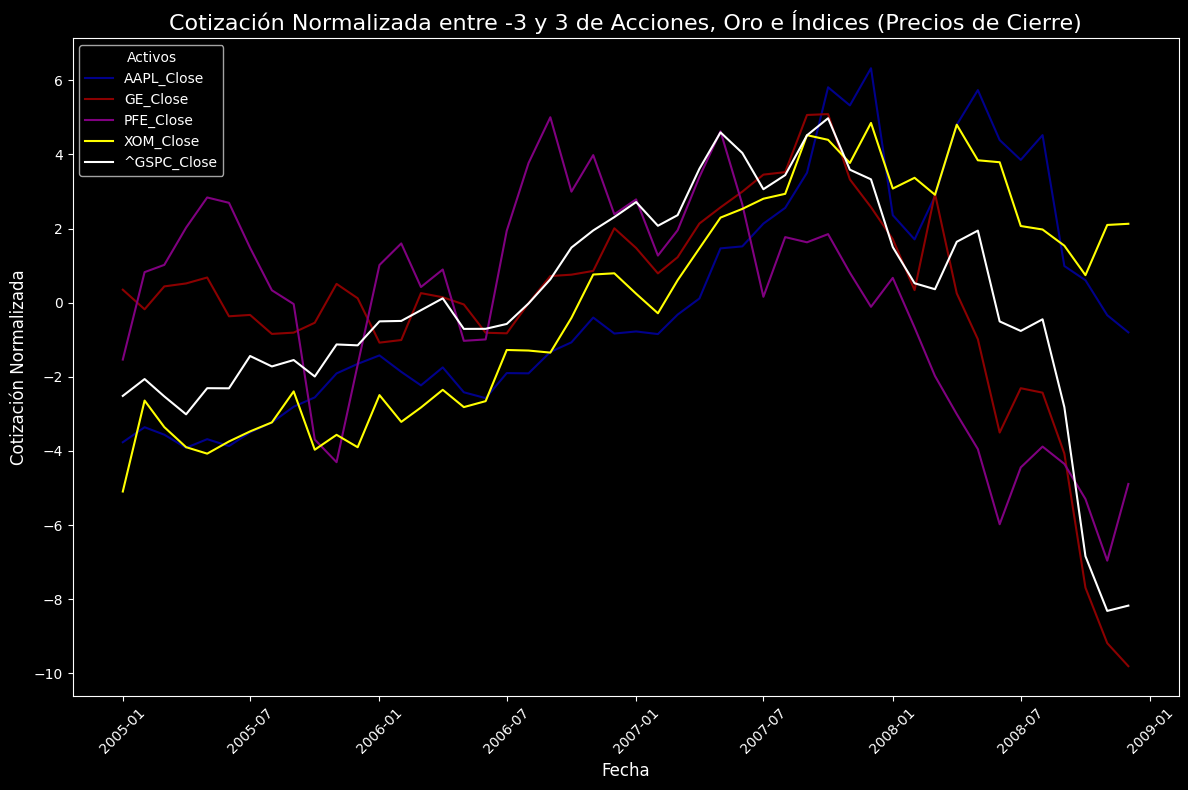

In [11]:
# Solicitar la ruta del archivo CSV
csv_path = r"C:\Users\anton\PROYECTO_EDA\PROYECTO_EDA\Proyecto-EDA\DATOS-CORRECTOS\acciones_indices_2005_2008.csv"

# Cargar el dataset desde el archivo CSV
df_completo = pd.read_csv(csv_path)

# Convertir la columna de fechas en formato datetime
df_completo['Date'] = pd.to_datetime(df_completo['Date'])

# Asegurarnos de que los datos están ordenados por fecha
df_completo = df_completo.sort_values(by='Date')

# ==========================
# Limpiar los datos
# ==========================
# Eliminar valores nulos en 'Adj Close'
df_completo = df_completo.dropna(subset=[col for col in df_completo.columns if '_Close' in col])

# ==========================
# Normalización de datos entre -3 y 3 (solo precios de cierre)
# ==========================
# Seleccionar las columnas de cierre ajustado
columns_to_normalize = [col for col in df_completo.columns if '_Close' in col]

# Estandarización Z-score (media 0, desviación estándar 1)
df_completo[columns_to_normalize] = df_completo[columns_to_normalize].apply(
    lambda x: (x - x.mean()) / x.std(), axis=0
)

# Escalamos los valores a un rango entre -3 y 3
df_completo[columns_to_normalize] = df_completo[columns_to_normalize] * 3

# ==========================
# Visualización: Gráfico de líneas con cotizaciones normalizadas
# ==========================
# Asignar colores personalizados para cada activo
colores = {
    'AAPL_Close': 'darkblue',   # Apple
    'XOM_Close':'yellow',   # Exxon Mobil
    'GE_Close': 'darkred',      # General Electric
    'PFE_Close': 'purple',      # Pfizer
    '^GSPC_Close': 'white',    # S&P 500
   
}

plt.figure(figsize=(12, 8))

# Graficar las cotizaciones normalizadas de cada activo
for columna in df_completo.columns:
    if '_Close' in columna:
        sns.lineplot(data=df_completo, x=df_completo['Date'], y=columna, label=columna, color=colores[columna])

# Mejorar el gráfico
plt.title("Cotización Normalizada entre -3 y 3 de Acciones, Oro e Índices (Precios de Cierre)", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Cotización Normalizada", fontsize=12)
plt.legend(title="Activos", fontsize=10)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para que sean legibles
plt.tight_layout()  # Ajustar para evitar superposición
plt.show()


# Inversión a Corto Plazo: Riesgo y Decisiones

Invertir a **corto plazo** es muy **riesgoso**, incluso si lo hacemos en un **índice diversificado**. En contextos de **recesión económica**, aunque la diversificación reduce el riesgo, este no desaparece por completo.

---

## El Mayor Error: Vender en Pérdidas  
Cuando vemos que nuestro dinero está **bajando**, lo peor que podemos hacer es **retirarlo**. Esto consolida las pérdidas y evita que el dinero se recupere con el tiempo.

---

## La Clave: Pensar a Largo Plazo  
- Invertir con **paciencia y cabeza** reduce el impacto de las caídas temporales.  
- A largo plazo, los mercados tienden a recuperarse y **crecer**.

---

## La Solución: Indexación  
La **indexación** es una estrategia simple y efectiva que veremos a continuación, ideal para invertir a largo plazo con menor riesgo y mejores resultados.



Resultados de la Cartera Conjunta:
                                 Métrica      Valor
0               Esperanza Anualizada (%)   0.036163
1                Varianza Anualizada (%)   1.143084
2              Desviación Anualizada (%)   1.069151
3  Probabilidad de Ganancia Positiva (%)  51.349117
4         Beneficio/Pérdida Esperado (€)  36.162750

Resultados de las 4 empresas con Probabilidad de Ganancia Positiva:
      Esperanza (%)  Varianza (%)  Desviación (%)  \
AAPL       0.138924      7.804319        2.793621   
GE        -0.058080      3.741141        1.934203   
XOM        0.072713      4.101516        2.025220   
PFE       -0.008906      2.642373        1.625538   

      Probabilidad de Ganancia Positiva (%)  
AAPL                              51.983088  
GE                                48.956096  
XOM                               51.432036  
PFE                               49.781420  


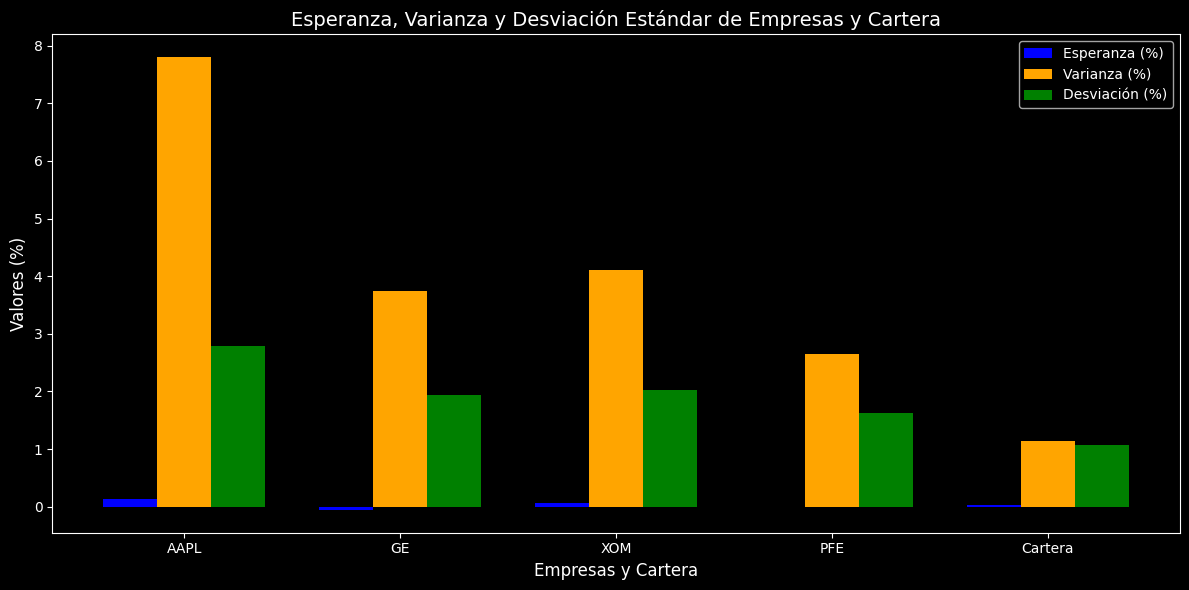

In [12]:


# ==========================
# Nuevos valores calculados de las 4 empresas
# ==========================
resultados_anteriores = {
    'AAPL': {'Esperanza (%)': 0.138924, 'Varianza (%)': 7.804319, 'Desviación (%)': 2.793621, 'Probabilidad de Ganancia Positiva (%)': 51.983088},
    'GE': {'Esperanza (%)': -0.058080, 'Varianza (%)': 3.741141, 'Desviación (%)': 1.934203, 'Probabilidad de Ganancia Positiva (%)': 48.956096},
    'XOM': {'Esperanza (%)': 0.072713, 'Varianza (%)': 4.101516, 'Desviación (%)': 2.025220, 'Probabilidad de Ganancia Positiva (%)': 51.432036},
    'PFE': {'Esperanza (%)': -0.008906, 'Varianza (%)': 2.642373, 'Desviación (%)': 1.625538, 'Probabilidad de Ganancia Positiva (%)': 49.781420},
}

# Crear DataFrame a partir de los resultados anteriores
resultados_df = pd.DataFrame(resultados_anteriores).T

# ==========================
# Proporciones de la cartera (partes iguales)
# ==========================
proporciones = np.array([0.25, 0.25, 0.25, 0.25])

# ==========================
# Calcular métricas de la cartera
# ==========================
# Esperanza de la cartera
esperanza_cartera = np.dot(proporciones, resultados_df['Esperanza (%)'])

# Varianza de la cartera (proporciones al cuadrado)
varianza_cartera = np.dot(proporciones ** 2, resultados_df['Varianza (%)'])

# Desviación estándar de la cartera
desviacion_cartera = np.sqrt(varianza_cartera)

# Probabilidad de ganancia positiva para la cartera
z_score_cartera = esperanza_cartera / desviacion_cartera
probabilidad_cartera = norm.cdf(z_score_cartera) * 100

# Calcular Beneficio/Pérdida Esperado (€)
inversion_inicial = 100000  # Por ejemplo, 100,000 €
beneficio_perdida = (esperanza_cartera / 100) * inversion_inicial

# ==========================
# Crear DataFrame con los resultados de la cartera
# ==========================
resultados_cartera = pd.DataFrame({
    'Métrica': ['Esperanza Anualizada (%)', 'Varianza Anualizada (%)', 'Desviación Anualizada (%)', 'Probabilidad de Ganancia Positiva (%)', 'Beneficio/Pérdida Esperado (€)'],
    'Valor': [esperanza_cartera, varianza_cartera, desviacion_cartera, probabilidad_cartera, beneficio_perdida]
})

# ==========================
# Mostrar resultados
# ==========================
print("\nResultados de la Cartera Conjunta:")
print(resultados_cartera)

print("\nResultados de las 4 empresas con Probabilidad de Ganancia Positiva:")
print(resultados_df)

# ==========================
# Representación Gráfica Mejorada
# ==========================
fig, ax = plt.subplots(figsize=(12, 6))

# Datos para el gráfico
empresas = list(resultados_df.index) + ['Cartera']
esperanzas = list(resultados_df['Esperanza (%)']) + [esperanza_cartera]
varianzas = list(resultados_df['Varianza (%)']) + [varianza_cartera]
desviaciones = list(resultados_df['Desviación (%)']) + [desviacion_cartera]

# Crear gráfico
x = np.arange(len(empresas))
width = 0.25

# Gráficos de barras
ax.bar(x - width, esperanzas, width, label='Esperanza (%)', color='blue')
ax.bar(x, varianzas, width, label='Varianza (%)', color='orange')
ax.bar(x + width, desviaciones, width, label='Desviación (%)', color='green')

# Etiquetas y diseño
ax.set_xlabel('Empresas y Cartera', fontsize=12)
ax.set_ylabel('Valores (%)', fontsize=12)
ax.set_title('Esperanza, Varianza y Desviación Estándar de Empresas y Cartera', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(empresas)
ax.legend()

# Diseño ajustado
plt.tight_layout()
plt.show()


# Reflexión sobre el Mercado y la Inversión

En momentos de crisis, tanto nuestras **acciones** como el **mercado en general** pueden actuar **negativamente**. Sin embargo, nunca podemos predecir con certeza cuándo estamos cerca de una **recesión económica**, aunque existan indicadores accesibles para expertos en economía.

---

## El Dilema del Inversor Común  
Para un **inversor promedio**, determinar el **momento ideal para invertir** es prácticamente imposible. Las fluctuaciones del mercado y los ciclos económicos son inciertos, especialmente en tiempos de crisis.

---

## La Clave: Inversión a Largo Plazo  
Se suele decir que **"siempre es buen momento para invertir a largo plazo"**.  
¿Por qué?  
- A largo plazo, los mercados en **economías relativamente estables** o **intervenidas** tienden a **subir**.  
- Incluso en un contexto con **recesiones**, el mercado suele **premiar la inversión constante**.

---

## Conclusión  
Invertir a largo plazo permite aprovechar el **crecimiento natural de los mercados**, suavizando los efectos de las recesiones y beneficiándose del ciclo económico positivo.


In [22]:


# ==========================
# Listado de las empresas y los índices
# ==========================
empresas = [
    'AAPL',   # Apple
    'GE',     # General Electric
    'PFE',    # Pfizer
    'XOM',    # Exxon Mobil
    '^GSPC'   # S&P 500
]

# ==========================
# Descargar los datos desde 2007 hasta 2010 con intervalo mensual
# ==========================
datos = {}

for empresa in empresas:
    # Descargar datos históricos desde 2007 hasta 2010
    data = yf.download(empresa, start='2005-01-01', end='2024-12-31', interval='1mo')
    
    # Guardar los datos de 'Open' y 'Adj Close' en el diccionario
    datos[empresa] = data[['Open', 'Adj Close']]

# ==========================
# Crear un DataFrame combinado
# ==========================
df_completo = pd.DataFrame()

# Combinar los datos de cada empresa en un solo DataFrame
for empresa, data in datos.items():
    df_completo[empresa + '_Open'] = data['Open']        # Precio de apertura
    df_completo[empresa + '_Close'] = data['Adj Close']  # Precio de cierre ajustado

# ==========================
# Mostrar y exportar los datos
# ==========================
print("\nPrimeras filas del DataFrame combinado:")
print(df_completo.head())



print(f'Datos de cotizaciones exportados correctamente a {csv_output_path}.')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Primeras filas del DataFrame combinado:
            AAPL_Open  AAPL_Close     GE_Open    GE_Close   PFE_Open  \
Date                                                                   
2005-01-01   1.156786    1.158371  175.930374  104.644012  25.910816   
2005-02-01   1.375893    1.351483  172.527740  101.950439  22.893738   
2005-03-01   1.606786    1.255379  169.029266  105.096779  25.170778   
2005-04-01   1.503214    1.086368  173.390381  105.504875  25.018974   
2005-05-01   1.293214    1.197837  172.911148  106.320892  25.853889   

            PFE_Close   XOM_Open  XOM_Close   ^GSPC_Open  ^GSPC_Close  
Date                                                                   
2005-01-01  10.186499  51.020000  26.784803  1211.920044  1181.270020  
2005-02-01  11.084561  51.980000  32.863274  1181.270020  1203.599976  
2005-03-01  11.159113  62.970001  31.089003  1203.599976  1180.589966  
2005-04-01  11.541422  60.099998  29.748402  1180.589966  1156.849976  
2005-05-01  11.851519 

# ¿Qué es la Indexación a un Índice?

La **indexación a un índice** es una estrategia de inversión que consiste en **replicar el rendimiento** de un índice financiero, como el **S&P 500** o el **IBEX 35**.

---

## ¿Cómo funciona?  
- Se invierte en un **fondo indexado** o un **ETF** que copia la composición del índice.  
- Si el índice sube un **5%**, tu inversión también subirá aproximadamente un **5%** (menos comisiones).  

---

## Ventajas  
1. **Sencillo**: No necesitas elegir acciones individuales.  
2. **Diversificación**: El índice incluye muchas empresas, reduciendo el riesgo.  
3. **Bajo costo**: Las comisiones suelen ser más bajas que en fondos gestionados.  
4. **Rentabilidad a largo plazo**: Los mercados tienden a subir en períodos largos.

---

## Ejemplo práctico  
Si inviertes en un fondo indexado al **S&P 500**, tu dinero seguirá el rendimiento de las **500 empresas más grandes de EE. UU.**  
- Cuando el índice sube, tu inversión sube.  
- Cuando el índice baja, tu inversión baja.  

---

## Conclusión  
La indexación es una forma simple, económica y eficiente de **invertir a largo plazo**, aprovechando el crecimiento general del mercado.


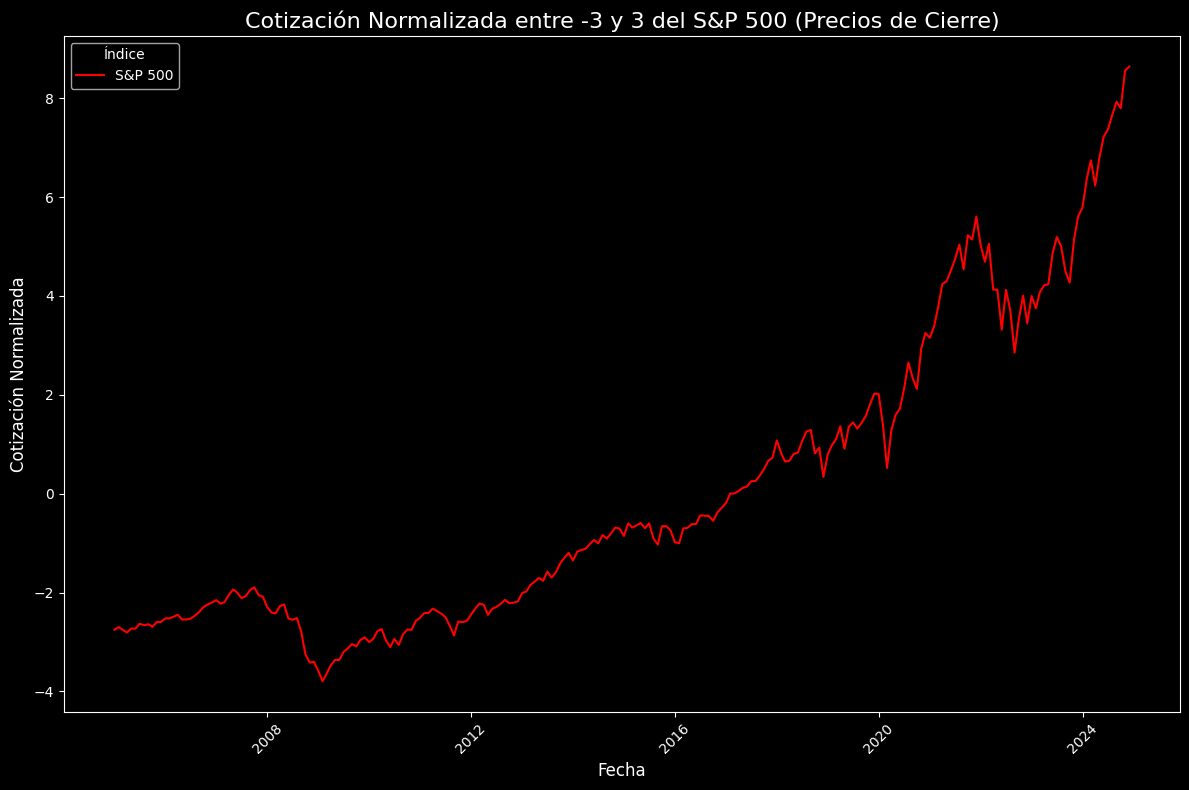

In [14]:
# Solicitar la ruta del archivo CSV
csv_path = r"C:\Users\anton\PROYECTO_EDA\PROYECTO_EDA\Proyecto-EDA\DATOS-CORRECTOS\\acciones_indices_2005_2024_INDEXADOS.csv"

# Cargar el dataset desde el archivo CSV
df_completo = pd.read_csv(csv_path)

# Convertir la columna de fechas en formato datetime
df_completo['Date'] = pd.to_datetime(df_completo['Date'])

# Asegurarnos de que los datos están ordenados por fecha
df_completo = df_completo.sort_values(by='Date')

# ==========================
# Limpiar los datos
# ==========================
# Eliminar valores nulos en 'Adj Close'
df_completo = df_completo.dropna(subset=[col for col in df_completo.columns if '_Close' in col])

# ==========================
# Normalización de datos entre -3 y 3 (solo precios de cierre)
# ==========================
# Seleccionar las columnas de cierre ajustado
columns_to_normalize = [col for col in df_completo.columns if '_Close' in col]

# Estandarización Z-score (media 0, desviación estándar 1)
df_completo[columns_to_normalize] = df_completo[columns_to_normalize].apply(
    lambda x: (x - x.mean()) / x.std(), axis=0
)

# Escalamos los valores a un rango entre -3 y 3
df_completo[columns_to_normalize] = df_completo[columns_to_normalize] * 3

# ==========================
# Visualización: Gráfico de líneas con cotizaciones normalizadas
# ==========================
plt.figure(figsize=(12, 8))

# Graficar las cotizaciones normalizadas de S&P 500 (únicamente)
sns.lineplot(data=df_completo, x=df_completo['Date'], y='^GSPC_Close', label='S&P 500', color='red')

# Mejorar el gráfico
plt.title("Cotización Normalizada entre -3 y 3 del S&P 500 (Precios de Cierre)", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Cotización Normalizada", fontsize=12)
plt.legend(title="Índice", fontsize=10)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para que sean legibles
plt.tight_layout()  # Ajustar para evitar superposición
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\anton\AppData\Local\Temp\ipykernel_25236\965799185.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_anual = df.resample('Y').last()  # Último precio del año
[*********************100%***********************]  1 of 1 completed
C:\Users\anton\AppData\Local\Temp\ipykernel_25236\965799185.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_anual = df.resample('Y').last()  # Último precio del año
[*********************100%***********************]  1 of 1 completed
C:\Users\anton\AppData\Local\Temp\ipykernel_25236\965799185.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_anual = df.resample('Y').last()  # Último precio del año
[*********************100%***********************]  1 of 1 completed
C:\Users\anton\AppData\Local\Temp\ipyker

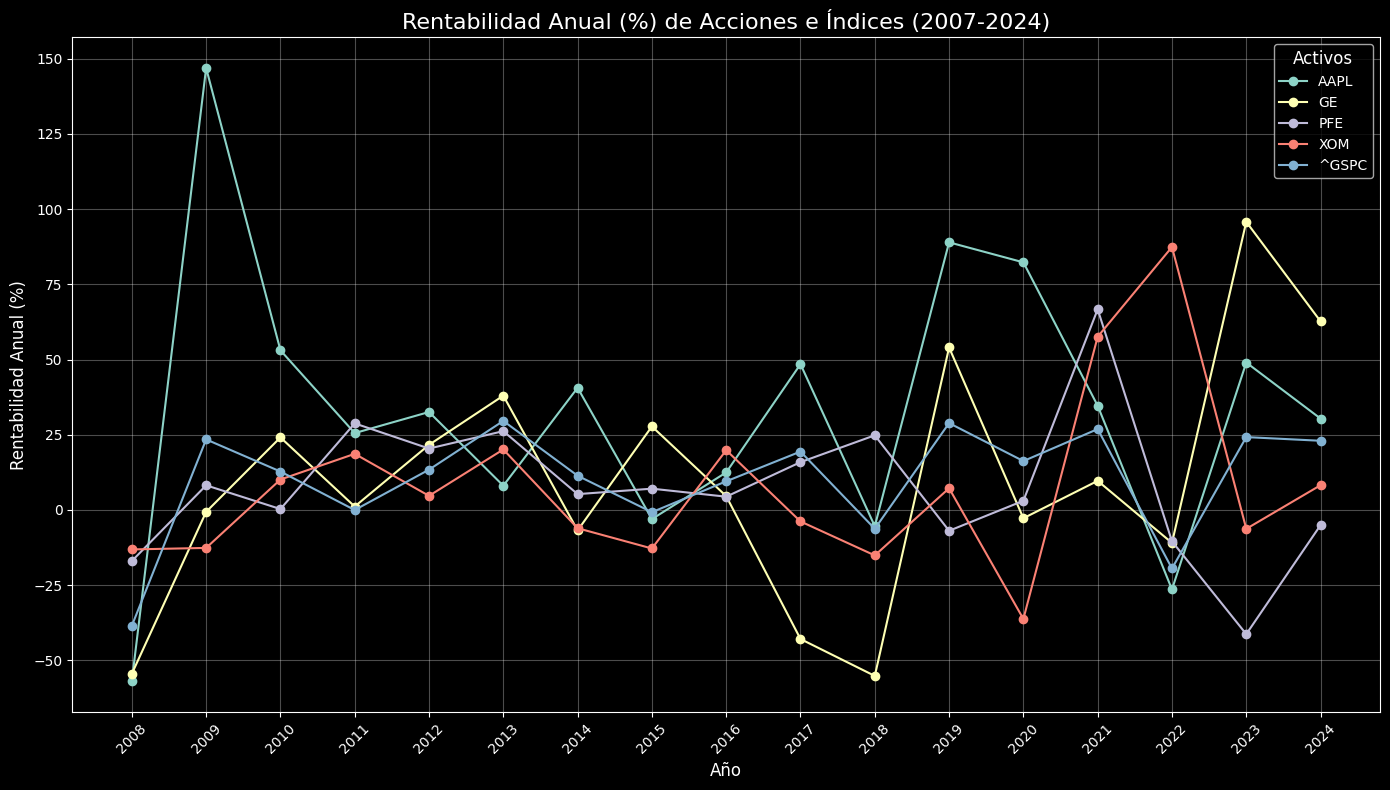

In [23]:

# Listado de los activos (acciones y el índice S&P 500)
activos = ['AAPL', 'GE', 'PFE', 'XOM', '^GSPC']

# Descargar datos históricos desde 2007 hasta 2024 con intervalo mensual
start_date = '2007-01-01'
end_date = '2024-12-31'

# Crear un DataFrame vacío para almacenar las rentabilidades anuales
rentabilidades_anuales = pd.DataFrame()

for activo in activos:
    # Descargar datos del activo
    df = yf.download(activo, start=start_date, end=end_date, interval='1mo')['Adj Close']
    
    # Calcular la rentabilidad anual como porcentaje
    df_anual = df.resample('Y').last()  # Último precio del año
    rentabilidad = df_anual.pct_change() * 100  # Calcular variación porcentual anual
    rentabilidades_anuales[activo] = rentabilidad

# Eliminar filas con valores NaN (primeros años)
rentabilidades_anuales = rentabilidades_anuales.dropna()

# ==========================
# Visualización de las rentabilidades anuales
# ==========================
plt.figure(figsize=(14, 8))

# Graficar la rentabilidad anual de cada activo
for activo in activos:
    plt.plot(rentabilidades_anuales.index.year, rentabilidades_anuales[activo], marker='o', label=activo)

# Mejorar el gráfico
plt.title('Rentabilidad Anual (%) de Acciones e Índices (2007-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Rentabilidad Anual (%)', fontsize=12)
plt.xticks(rentabilidades_anuales.index.year, rotation=45)  # Asegurar que solo aparecen años en el eje X
plt.legend(title='Activos', fontsize=10, title_fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar gráfico
plt.show()



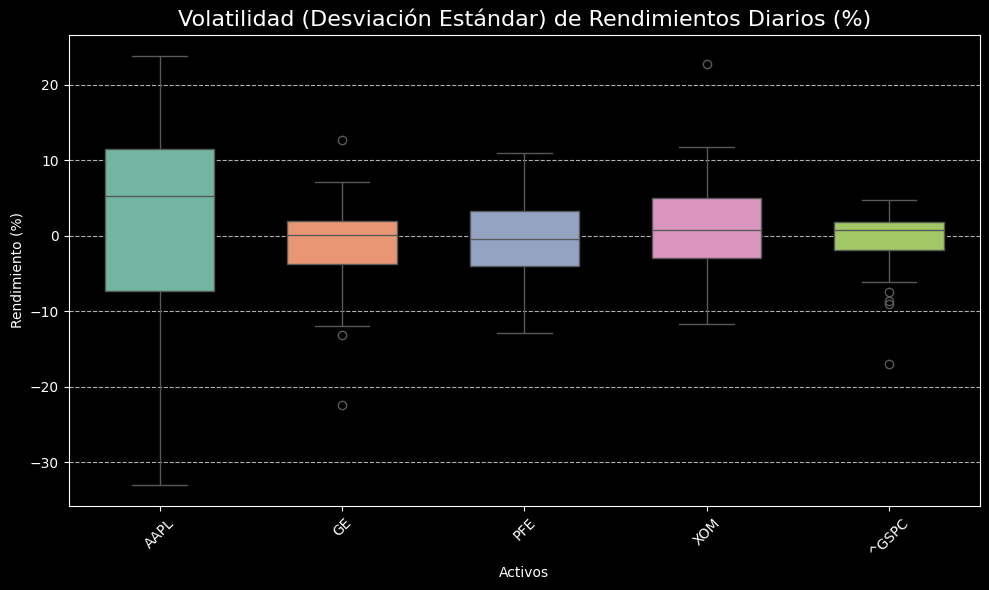


Volatilidad de los activos:
       Volatilidad (%)
AAPL         12.796578
GE            6.064776
PFE           5.555021
XOM           6.086915
^GSPC         4.028590


In [16]:

# ==========================
# Cargar el archivo CSV
# ==========================
csv_path = r"C:\Users\anton\PROYECTO_EDA\PROYECTO_EDA\Proyecto-EDA\DATOS-CORRECTOS\acciones_indices_2005_2008.csv"

# Leer el archivo CSV en un DataFrame
df_completo = pd.read_csv(csv_path)

# ==========================
# Limpiar y preparar los datos
# ==========================
# Convertir la columna de fechas a tipo datetime
df_completo['Date'] = pd.to_datetime(df_completo['Date'])

# Ordenar por fecha
df_completo = df_completo.sort_values(by='Date')

# Seleccionar las columnas de cierre ajustado
columns_to_analyze = [col for col in df_completo.columns if '_Close' in col]

# Calcular los rendimientos diarios
rendimientos = df_completo[columns_to_analyze].pct_change().dropna()

# ==========================
# Calcular volatilidad (desviación estándar)
# ==========================
volatilidad = rendimientos.std() * 100  # Convertir a porcentaje
volatilidad_df = pd.DataFrame(volatilidad, columns=['Volatilidad (%)'])
volatilidad_df.index = [col.replace('_Close', '') for col in volatilidad_df.index]  # Limpiar nombres

# ==========================
# Visualización de la volatilidad
# ==========================
plt.figure(figsize=(10, 6))
sns.boxplot(data=rendimientos * 100, orient='v', width=0.6, palette='Set2')
plt.xticks(ticks=range(len(volatilidad_df.index)), labels=volatilidad_df.index, rotation=45)
plt.title('Volatilidad (Desviación Estándar) de Rendimientos Diarios (%)', fontsize=16)
plt.ylabel('Rendimiento (%)')
plt.xlabel('Activos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ==========================
# Mostrar resultados
# ==========================
print("\nVolatilidad de los activos:")
print(volatilidad_df)


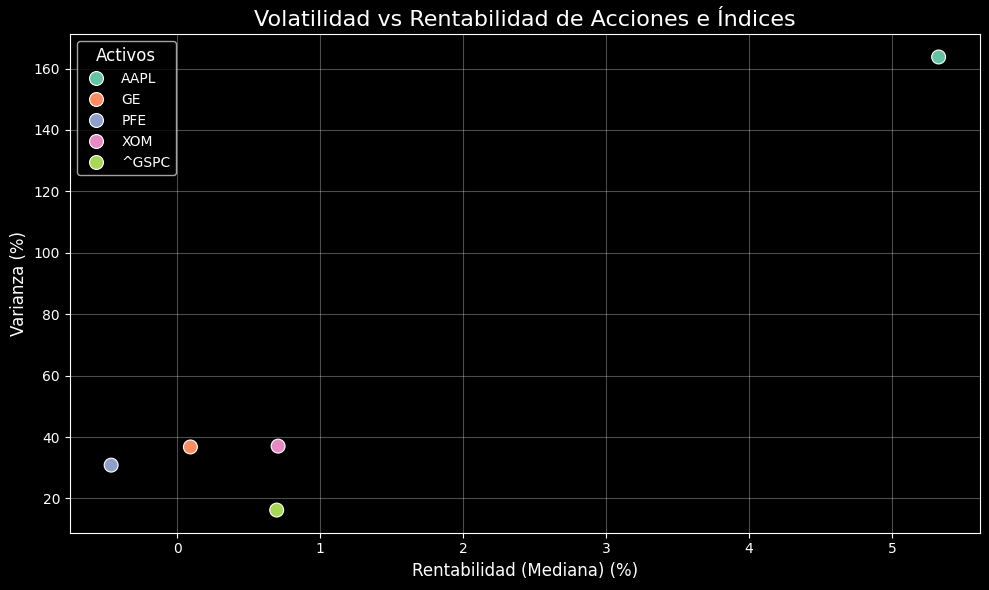


Métricas calculadas (Rentabilidad y Varianza):
       Rentabilidad (Mediana)    Varianza
AAPL                 5.326028  163.752396
GE                   0.091285   36.781510
PFE                 -0.463241   30.858259
XOM                  0.704818   37.050533
^GSPC                0.694902   16.229540


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Cargar los datos
# ==========================
csv_path = r"C:\Users\anton\PROYECTO_EDA\PROYECTO_EDA\Proyecto-EDA\DATOS-CORRECTOS\acciones_indices_2005_2008.csv"
df_completo = pd.read_csv(csv_path)

# Convertir la columna de fechas a tipo datetime
df_completo['Date'] = pd.to_datetime(df_completo['Date'])

# Ordenar por fecha
df_completo = df_completo.sort_values(by='Date')

# Seleccionar las columnas de cierre ajustado
columns_to_analyze = [col for col in df_completo.columns if '_Close' in col]

# Calcular rendimientos diarios
rendimientos = df_completo[columns_to_analyze].pct_change().dropna()

# ==========================
# Calcular métricas
# ==========================
# Rentabilidad (mediana) y varianza para cada activo
rentabilidad_mediana = rendimientos.median()
varianza = rendimientos.var()

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({
    'Rentabilidad (Mediana)': rentabilidad_mediana * 100,  # Convertir a porcentaje
    'Varianza': varianza * 10000  # Ajustar escala
})

# Limpiar nombres de columnas
metrics_df.index = [col.replace('_Close', '') for col in metrics_df.index]

# ==========================
# Visualización
# ==========================
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

# Crear gráfico de dispersión
sns.scatterplot(
    x=metrics_df['Rentabilidad (Mediana)'],
    y=metrics_df['Varianza'],
    s=100,  # Tamaño de los puntos
    hue=metrics_df.index,  # Colorear por activo
    palette='Set2'
)

# Mejorar el gráfico
plt.title("Volatilidad vs Rentabilidad de Acciones e Índices", fontsize=16, color='white')
plt.xlabel("Rentabilidad (Mediana) (%)", fontsize=12, color='white')
plt.ylabel("Varianza (%)", fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(title="Activos", fontsize=10, title_fontsize=12, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ==========================
# Mostrar tabla de métricas
# ==========================
print("\nMétricas calculadas (Rentabilidad y Varianza):")
print(metrics_df)


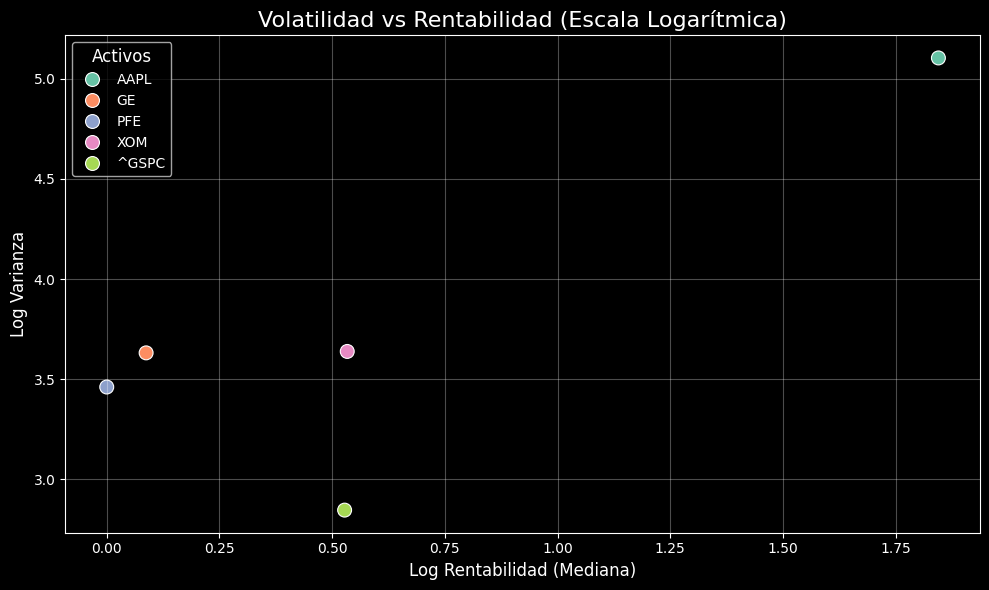


Métricas calculadas (Rentabilidad y Varianza):
       Rentabilidad (Mediana)    Varianza
AAPL                 5.326028  163.752396
GE                   0.091285   36.781510
PFE                 -0.463241   30.858259
XOM                  0.704818   37.050533
^GSPC                0.694902   16.229540


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Cargar los datos
# ==========================
csv_path = r"C:\Users\anton\PROYECTO_EDA\PROYECTO_EDA\Proyecto-EDA\DATOS-CORRECTOS\acciones_indices_2005_2008.csv"
df_completo = pd.read_csv(csv_path)

# Convertir la columna de fechas a tipo datetime
df_completo['Date'] = pd.to_datetime(df_completo['Date'])

# Ordenar por fecha
df_completo = df_completo.sort_values(by='Date')

# Seleccionar las columnas de cierre ajustado
columns_to_analyze = [col for col in df_completo.columns if '_Close' in col]

# Calcular rendimientos diarios
rendimientos = df_completo[columns_to_analyze].pct_change().dropna()

# ==========================
# Calcular métricas
# ==========================
# Rentabilidad (mediana) y varianza para cada activo
rentabilidad_mediana = rendimientos.median()
varianza = rendimientos.var()

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({
    'Rentabilidad (Mediana)': rentabilidad_mediana * 100,  # Convertir a porcentaje
    'Varianza': varianza * 10000  # Ajustar escala
})

# Limpiar nombres de columnas
metrics_df.index = [col.replace('_Close', '') for col in metrics_df.index]

# ==========================
# Escalar las métricas
# ==========================
# Usar logaritmos para escalar las varianzas y rentabilidades
metrics_df['Log Rentabilidad (Mediana)'] = np.log1p(metrics_df['Rentabilidad (Mediana)'].clip(lower=0))
metrics_df['Log Varianza'] = np.log1p(metrics_df['Varianza'])

# ==========================
# Visualización
# ==========================
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

# Crear gráfico de dispersión
sns.scatterplot(
    x=metrics_df['Log Rentabilidad (Mediana)'],
    y=metrics_df['Log Varianza'],
    s=100,  # Tamaño de los puntos
    hue=metrics_df.index,  # Colorear por activo
    palette='Set2'
)

# Mejorar el gráfico
plt.title("Volatilidad vs Rentabilidad (Escala Logarítmica)", fontsize=16, color='white')
plt.xlabel("Log Rentabilidad (Mediana)", fontsize=12, color='white')
plt.ylabel("Log Varianza", fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(title="Activos", fontsize=10, title_fontsize=12, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ==========================
# Mostrar tabla de métricas
# ==========================
print("\nMétricas calculadas (Rentabilidad y Varianza):")
print(metrics_df[['Rentabilidad (Mediana)', 'Varianza']])
